# Advanced Programming VU -- Project 2 - Data Science

 ## 1) Import data from Kaggle and Setting directory

In [18]:
from IPython.display import Image
from IPython.core.display import HTML 

In [7]:
import kaggle

In [8]:
import os


In [11]:
%cd data

C:\Users\Jakob\Desktop\SoSe 2023\VU Advanced Programming Techniques\Portfolio\14hinum\Topic1_Data Science\data


In [4]:
%mkdir Spaceship

In [12]:
%cd Spaceship

C:\Users\Jakob\Desktop\SoSe 2023\VU Advanced Programming Techniques\Portfolio\14hinum\Topic1_Data Science\data\Spaceship


In [13]:
current_directory = os.getcwd()
print("Current directory:", current_directory)


Current directory: C:\Users\Jakob\Desktop\SoSe 2023\VU Advanced Programming Techniques\Portfolio\14hinum\Topic1_Data Science\data\Spaceship


In [8]:
! kaggle competitions download -c spaceship-titanic


  0%|          | 0.00/299k [00:00<?, ?B/s]
100%|##########| 299k/299k [00:00<00:00, 679kB/s]
100%|##########| 299k/299k [00:00<00:00, 677kB/s]


In [2]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

import seaborn as sns

## 2) Description of the project/challenge and loading data

### Spaceship Titanic
#### Predict which passengers are transported to an alternate dimension

Kaggle info: In this competition the task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.



In [121]:
# load the train-data which are personal records for about two thirds (~8700) of the passengers and which can be used as training for ML approaches but
# for exploartory data analysis as well

## load the dataset via read_csv from pandas
train_data_space=pd.read_csv("train.csv")
## see the first 5 entries
train_data_space.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [122]:
##look at the size of the dataset 
train_data_space.shape

(8693, 14)

In [123]:
#Personal records for the remaining one-third (~4300) of the passengers, to be used as test data but for exploartory data analysis as well

## load the dataset via read_csv from pandas
test_data_space=pd.read_csv("test.csv")
## see the first 5 entries
test_data_space.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

 ## 3) Preparation of the data sets

### Getting info of data

In [124]:
# First get some infos about the traindata and testdata set
train_data_space.info()
print("\n")
test_data_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count

In [125]:
# List the categorical variables --> objects

print("Categories traindata:")
for col in train_data_space.select_dtypes(include=['object']).columns:
    print(col)
print("\n")
print("Categories testdata:")
for col in test_data_space.select_dtypes(include=['object']).columns:
    print(col)

Categories traindata:
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


Categories testdata:
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [126]:
# List the numerical variables --> float64

print("Numerical variables traindata:")
for col in train_data_space.select_dtypes(include=['float64']).columns:
    print(col)
print("\n")

print("Numerical variables testdata:")
for col in test_data_space.select_dtypes(include=['float64']).columns:
    print(col)

Numerical variables traindata:
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


Numerical variables testdata:
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [127]:
# List the boolean variables --> bool
print("Boolean variables traindata:")
for col in train_data_space.select_dtypes(include=['bool']).columns:
    print(col)
print("\n")

print("Boolean variables testdata:")
for col in test_data_space.select_dtypes(include=['bool']).columns:
    print(col)

Boolean variables traindata:
Transported


Boolean variables testdata:


### Taking some parsing steps in the test and the traindata

#### Parising of the PassengerID

Since the passengerID is built up of two number groups, it is recommended to split up the column into two passengerid columns and convert to floats

In [128]:
train_data_space.insert(0, "Passengerid_2", train_data_space["PassengerId"].apply(lambda x: x.split("_")[-1] if type(x) == str else np.nan))
train_data_space.insert(0, "Passengerid_1", train_data_space["PassengerId"].apply(lambda x: x.split("_")[-2] if type(x) == str else np.nan))
train_data_space = train_data_space.drop(columns="PassengerId")

train_data_space.head()

Passengerid_1 Passengerid_2 HomePlanet CryoSleep  Cabin  Destination   Age  \
0          0001            01     Europa     False  B/0/P  TRAPPIST-1e  39.0   
1          0002            01      Earth     False  F/0/S  TRAPPIST-1e  24.0   
2          0003            01     Europa     False  A/0/S  TRAPPIST-1e  58.0   
3          0003            02     Europa     False  A/0/S  TRAPPIST-1e  33.0   
4          0004            01      Earth     False  F/1/S  TRAPPIST-1e  16.0   

     VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0  False          0.0        0.0           0.0     0.0     0.0   
1  False        109.0        9.0          25.0   549.0    44.0   
2   True         43.0     3576.0           0.0  6715.0    49.0   
3  False          0.0     1283.0         371.0  3329.0   193.0   
4  False        303.0       70.0         151.0   565.0     2.0   

                Name  Transported  
0    Maham Ofracculy        False  
1       Juanna Vines         True  
2      Altark Susent        False  
3       Solam Susent        False  
4  Willy Santantines         True

In [129]:
test_data_space.insert(0, "Passengerid_2", test_data_space["PassengerId"].apply(lambda x: x.split("_")[-1] if type(x) == str else np.nan))
test_data_space.insert(0, "Passengerid_1", test_data_space["PassengerId"].apply(lambda x: x.split("_")[-2] if type(x) == str else np.nan))
test_data_space = test_data_space.drop(columns="PassengerId")

test_data_space.head()

Passengerid_1 Passengerid_2 HomePlanet CryoSleep  Cabin  Destination   Age  \
0          0013            01      Earth      True  G/3/S  TRAPPIST-1e  27.0   
1          0018            01      Earth     False  F/4/S  TRAPPIST-1e  19.0   
2          0019            01     Europa      True  C/0/S  55 Cancri e  31.0   
3          0021            01     Europa     False  C/1/S  TRAPPIST-1e  38.0   
4          0023            01      Earth     False  F/5/S  TRAPPIST-1e  20.0   

     VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0  False          0.0        0.0           0.0     0.0     0.0   
1  False          0.0        9.0           0.0  2823.0     0.0   
2  False          0.0        0.0           0.0     0.0     0.0   
3  False          0.0     6652.0           0.0   181.0   585.0   
4  False         10.0        0.0         635.0     0.0     0.0   

               Name  
0   Nelly Carsoning  
1    Lerome Peckers  
2   Sabih Unhearfus  
3  Meratz Caltilter  
4   Brence Harperez

In [130]:
train_data_space.Passengerid_1=train_data_space.Passengerid_1.astype(float)
train_data_space.Passengerid_2=train_data_space.Passengerid_2.astype(float)
train_data_space.head()

test_data_space.Passengerid_1=test_data_space.Passengerid_1.astype(float)
test_data_space.Passengerid_2=test_data_space.Passengerid_2.astype(float)
test_data_space.head()

Passengerid_1  Passengerid_2 HomePlanet CryoSleep  Cabin  Destination  \
0           13.0            1.0      Earth      True  G/3/S  TRAPPIST-1e   
1           18.0            1.0      Earth     False  F/4/S  TRAPPIST-1e   
2           19.0            1.0     Europa      True  C/0/S  55 Cancri e   
3           21.0            1.0     Europa     False  C/1/S  TRAPPIST-1e   
4           23.0            1.0      Earth     False  F/5/S  TRAPPIST-1e   

    Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0  27.0  False          0.0        0.0           0.0     0.0     0.0   
1  19.0  False          0.0        9.0           0.0  2823.0     0.0   
2  31.0  False          0.0        0.0           0.0     0.0     0.0   
3  38.0  False          0.0     6652.0           0.0   181.0   585.0   
4  20.0  False         10.0        0.0         635.0     0.0     0.0   

               Name  
0   Nelly Carsoning  
1    Lerome Peckers  
2   Sabih Unhearfus  
3  Meratz Caltilter  
4   Brence Harperez

#### Parising of the Cabin

Since the Cabin contains 3 different infos as different side,   it is recommended to split up the column into three for every caabin mark. One has to make sure that the nans are considered correctly

In [131]:

cabin_index = train_data_space .columns.tolist().index("Cabin")  

new_columns = ["Cabin_3", "Cabin_2", "Cabin_1"]
for i, col in enumerate(new_columns):
    train_data_space .insert(loc=cabin_index, column=col, value=train_data_space ["Cabin"].apply(lambda x: x.split("/")[-i-1] if isinstance(x, str) else np.nan))

train_data_space = train_data_space.drop(columns="Cabin")

train_data_space.head()


Passengerid_1  Passengerid_2 HomePlanet CryoSleep Cabin_1 Cabin_2 Cabin_3  \
0            1.0            1.0     Europa     False       B       0       P   
1            2.0            1.0      Earth     False       F       0       S   
2            3.0            1.0     Europa     False       A       0       S   
3            3.0            2.0     Europa     False       A       0       S   
4            4.0            1.0      Earth     False       F       1       S   

   Destination   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0  TRAPPIST-1e  39.0  False          0.0        0.0           0.0     0.0   
1  TRAPPIST-1e  24.0  False        109.0        9.0          25.0   549.0   
2  TRAPPIST-1e  58.0   True         43.0     3576.0           0.0  6715.0   
3  TRAPPIST-1e  33.0  False          0.0     1283.0         371.0  3329.0   
4  TRAPPIST-1e  16.0  False        303.0       70.0         151.0   565.0   

   VRDeck               Name  Transported  
0     0.0    Maham Ofracculy        False  
1    44.0       Juanna Vines         True  
2    49.0      Altark Susent        False  
3   193.0       Solam Susent        False  
4     2.0  Willy Santantines         True

In [132]:

cabin_index = test_data_space .columns.tolist().index("Cabin")  

new_columns = ["Cabin_3", "Cabin_2", "Cabin_1"]
for i, col in enumerate(new_columns):
    test_data_space .insert(loc=cabin_index, column=col, value=test_data_space ["Cabin"].apply(lambda x: x.split("/")[-i-1] if isinstance(x, str) else np.nan))

test_data_space = test_data_space.drop(columns="Cabin")

test_data_space.head()


Passengerid_1  Passengerid_2 HomePlanet CryoSleep Cabin_1 Cabin_2 Cabin_3  \
0           13.0            1.0      Earth      True       G       3       S   
1           18.0            1.0      Earth     False       F       4       S   
2           19.0            1.0     Europa      True       C       0       S   
3           21.0            1.0     Europa     False       C       1       S   
4           23.0            1.0      Earth     False       F       5       S   

   Destination   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0  TRAPPIST-1e  27.0  False          0.0        0.0           0.0     0.0   
1  TRAPPIST-1e  19.0  False          0.0        9.0           0.0  2823.0   
2  55 Cancri e  31.0  False          0.0        0.0           0.0     0.0   
3  TRAPPIST-1e  38.0  False          0.0     6652.0           0.0   181.0   
4  TRAPPIST-1e  20.0  False         10.0        0.0         635.0     0.0   

   VRDeck              Name  
0     0.0   Nelly Carsoning  
1     0.0    Lerome Peckers  
2     0.0   Sabih Unhearfus  
3   585.0  Meratz Caltilter  
4     0.0   Brence Harperez

#### Parising of the Names

Since the Family names and the first names are in a column it makes also sense to parse them into two seperate columns

In [133]:
name_index = test_data_space.columns.tolist().index("Name")  

new_columns = ["Family Name", "First Name"]
for i, col in enumerate(new_columns):
    train_data_space .insert(loc=name_index, column=col, value=train_data_space ["Name"].apply(lambda x: x.split(" ")[-i-1] if isinstance(x, str) else np.nan))

train_data_space = train_data_space.drop(columns="Name")

train_data_space.head()

Passengerid_1  Passengerid_2 HomePlanet CryoSleep Cabin_1 Cabin_2 Cabin_3  \
0            1.0            1.0     Europa     False       B       0       P   
1            2.0            1.0      Earth     False       F       0       S   
2            3.0            1.0     Europa     False       A       0       S   
3            3.0            2.0     Europa     False       A       0       S   
4            4.0            1.0      Earth     False       F       1       S   

   Destination   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0  TRAPPIST-1e  39.0  False          0.0        0.0           0.0     0.0   
1  TRAPPIST-1e  24.0  False        109.0        9.0          25.0   549.0   
2  TRAPPIST-1e  58.0   True         43.0     3576.0           0.0  6715.0   
3  TRAPPIST-1e  33.0  False          0.0     1283.0         371.0  3329.0   
4  TRAPPIST-1e  16.0  False        303.0       70.0         151.0   565.0   

   VRDeck First Name  Family Name  Transported  
0     0.0      Maham    Ofracculy        False  
1    44.0     Juanna        Vines         True  
2    49.0     Altark       Susent        False  
3   193.0      Solam       Susent        False  
4     2.0      Willy  Santantines         True

In [134]:
name_index = test_data_space.columns.tolist().index("Name")  

new_columns = ["Family Name", "First Name"]
for i, col in enumerate(new_columns):
    test_data_space .insert(loc=name_index, column=col, value=test_data_space ["Name"].apply(lambda x: x.split(" ")[-i-1] if isinstance(x, str) else np.nan))

test_data_space = test_data_space.drop(columns="Name")

test_data_space.head()


Passengerid_1  Passengerid_2 HomePlanet CryoSleep Cabin_1 Cabin_2 Cabin_3  \
0           13.0            1.0      Earth      True       G       3       S   
1           18.0            1.0      Earth     False       F       4       S   
2           19.0            1.0     Europa      True       C       0       S   
3           21.0            1.0     Europa     False       C       1       S   
4           23.0            1.0      Earth     False       F       5       S   

   Destination   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0  TRAPPIST-1e  27.0  False          0.0        0.0           0.0     0.0   
1  TRAPPIST-1e  19.0  False          0.0        9.0           0.0  2823.0   
2  55 Cancri e  31.0  False          0.0        0.0           0.0     0.0   
3  TRAPPIST-1e  38.0  False          0.0     6652.0           0.0   181.0   
4  TRAPPIST-1e  20.0  False         10.0        0.0         635.0     0.0   

   VRDeck First Name Family Name  
0     0.0      Nelly   Carsoning  
1     0.0     Lerome     Peckers  
2     0.0      Sabih   Unhearfus  
3   585.0     Meratz   Caltilter  
4     0.0     Brence    Harperez

### Changing data types 
Finally the CryoSleep and VIP and transporeted column types are changed 


In [138]:
train_data_space.CryoSleep=train_data_space.CryoSleep.astype(bool)
train_data_space.VIP=train_data_space.VIP.astype(bool)
train_data_space.Transported=train_data_space.Transported.astype(bool)
train_data_space.head()


test_data_space.CryoSleep=test_data_space.CryoSleep.astype(bool)
test_data_space.VIP=test_data_space.VIP.astype(bool)
test_data_space.head()


Passengerid_1  Passengerid_2 HomePlanet  CryoSleep Cabin_1 Cabin_2 Cabin_3  \
0           13.0            1.0      Earth       True       G       3       S   
1           18.0            1.0      Earth      False       F       4       S   
2           19.0            1.0     Europa       True       C       0       S   
3           21.0            1.0     Europa      False       C       1       S   
4           23.0            1.0      Earth      False       F       5       S   

   Destination   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0  TRAPPIST-1e  27.0  False          0.0        0.0           0.0     0.0   
1  TRAPPIST-1e  19.0  False          0.0        9.0           0.0  2823.0   
2  55 Cancri e  31.0  False          0.0        0.0           0.0     0.0   
3  TRAPPIST-1e  38.0  False          0.0     6652.0           0.0   181.0   
4  TRAPPIST-1e  20.0  False         10.0        0.0         635.0     0.0   

   VRDeck First Name Family Name  
0     0.0      Nelly   Carsoning  
1     0.0     Lerome     Peckers  
2     0.0      Sabih   Unhearfus  
3   585.0     Meratz   Caltilter  
4     0.0     Brence    Harperez

 ## 4) Exploratory Data analyis
 
 Exploratory Data Analysis (EDA) is an approach to data analysis that involves a variety of techniques for summarizing and visualizing the main characteristics of a dataset. It's often one of the first steps in data analysis, helping to determine what kind of modeling or other processing might be appropriate for the dataset.

EDA primarily uses graphical techniques and summary statistics to understand data. The main objective is to see what the data can tell us beyond the formal modeling or hypothesis testing tasks. It can provide a deeper understanding of the variables and the relationships between them.

It can also help identify outliers, missing values, or human error. EDA is all about making sense of data in hand—without making many assumptions!

### Research questions

1. What is the distribution of passengers across different HomePlanets and Destinations? Are there any popular planets? Did the transportation depend on the destination ?

2. How are the Age values distributed? Are there more young or older passengers? What is the average age? and how does it depend on the transported staatus write in python baaased on the data set above

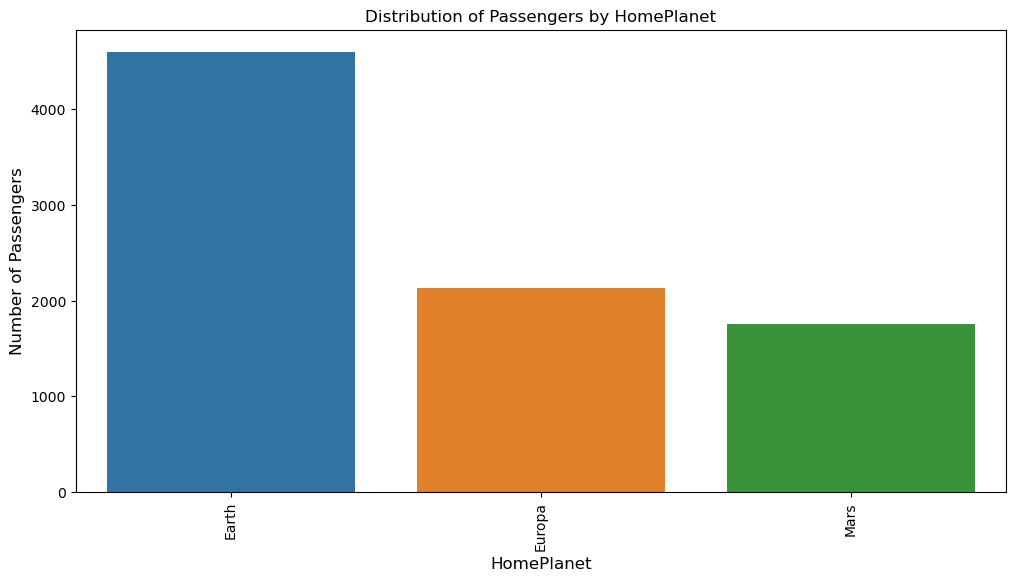

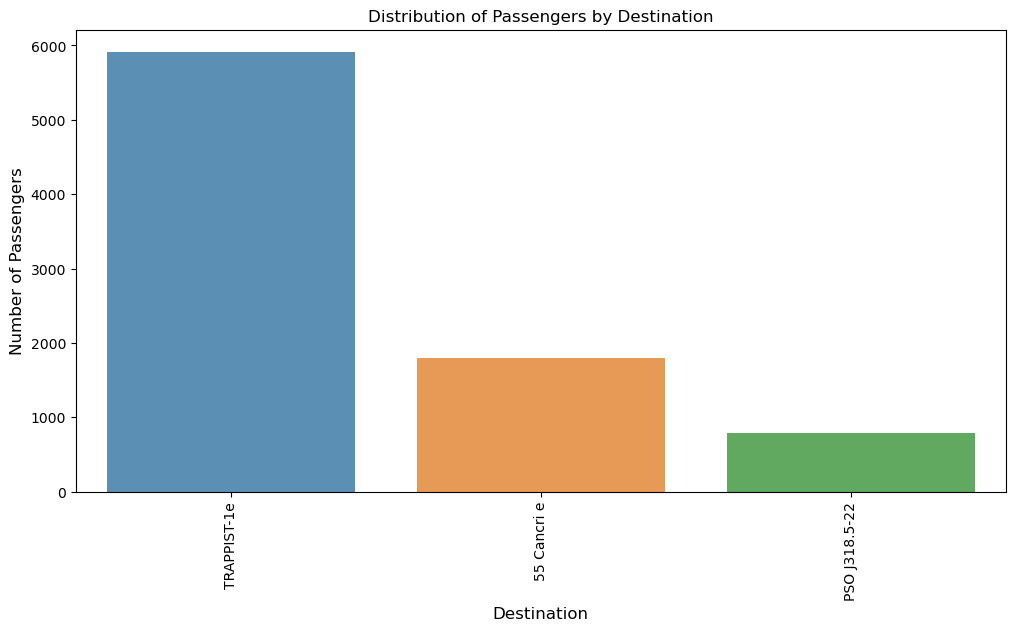

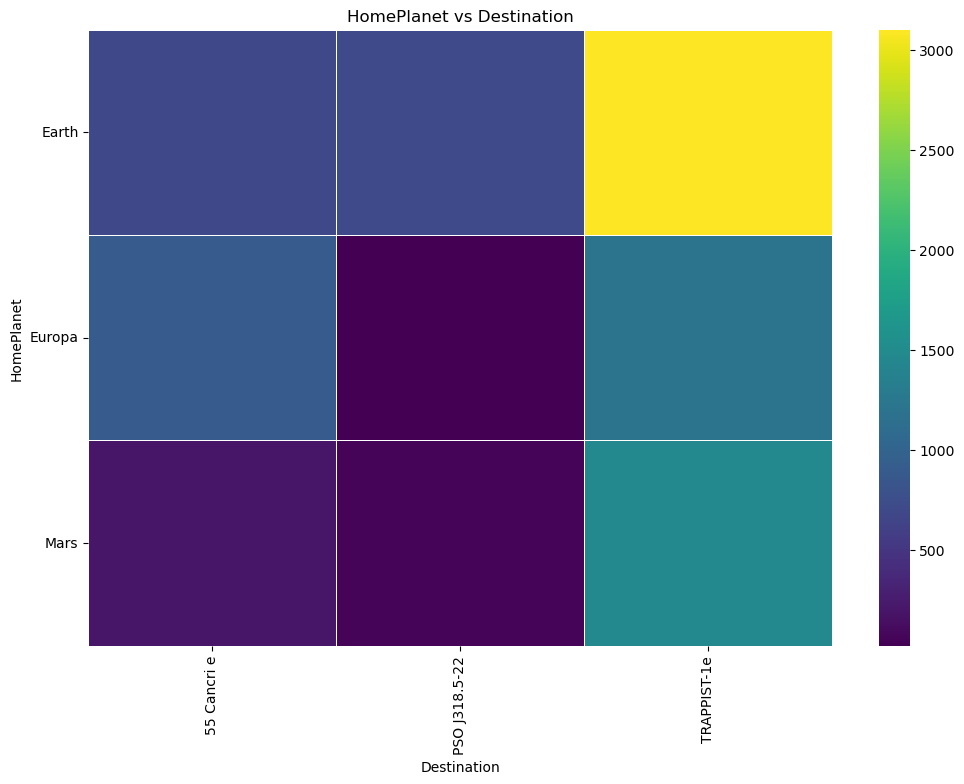

In [154]:
#1 What is the distribution of passengers across different HomePlanets and Destinations? Are there any popular planets?

#First we count number of passengers by HomePlanet
homeplanet_counts = train_data_space['HomePlanet'].value_counts()

#Then we plot a bar graph of HomePlanet counts 
plt.figure(figsize=(12, 6))
sns.barplot(data=train_data_space, x=homeplanet_counts.index, y=homeplanet_counts.values)
plt.title('Distribution of Passengers by HomePlanet')
plt.ylabel('Number of Passengers', fontsize=12)
plt.xlabel('HomePlanet', fontsize=12)
plt.xticks(rotation=90)
plt.show()

#Then Count number of passengers by Destination
destination_counts = train_data_space['Destination'].value_counts()

#Then we plot a bar graph of Destination counts
plt.figure(figsize=(12, 6))
sns.barplot(data=train_data_space, x=destination_counts.index, y=destination_counts.values, alpha=0.8)
plt.title('Distribution of Passengers by Destination')
plt.ylabel('Number of Passengers', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)
plt.show()
## Look for crosscorrelations between home and destination
crosstab = pd.crosstab(train_data_space['HomePlanet'], train_data_space['Destination'])

# To better visualize this, we can use a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, cmap='viridis', linewidths=.5)
plt.title('HomePlanet vs Destination')
plt.xlabel('Destination')
plt.ylabel('HomePlanet')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
## Look for crosscorelation between home planet and destination and taking the transported property into account in terms of the home planet
pd.crosstab([train_data_space['HomePlanet'], train_data_space['Transported']],train_data_space['Destination']).style.background_gradient(cmap='viridis')



## Answer to research question 1: 
What is the distribution of passengers across different HomePlanets and Destinations?  Did the transportation depend on the home planet ?

From just looking at the first two bar charts we can see that most passengers come from earth, secound most from the Jupiter moon Europa and third most from Mars. It seems that those are up to that date the only planets and moons that are populated and where the people are on the space journey. From the secound bar chart we can see thaat TRAPPISTE-1e is the planet chosen from most passengers as destination , 55 Cancri e is chosen  secound most as destination and PSO J318.5-22 as third most destination. It seems those three planets haave been investigated in previous missions and decided to be very habitable. 

From the first cross correlation table, we can  clearly see that Passengers that are from earth  and marsreally like to got to the TRAPPISTE-1e system which is probably due to similar conditions in terms of gravity, atmosphere and so on. The passengers from Europa tend to chose the 55 Cancri e as their destination maybe due to similar reasons. 

When looking at the secound heatmap, where the transported is included, we see that from earth the number of proportion of successfully transported over total transported people to TRAPPIST-1e is 38% to PSO J318.5-22 is  is 49 % and  to 55 Cancri e is 50%. The same proportion from Europa to TRAPPOST-1e is 63% , from Europa to PSO J317.5-22 is 73% and from Europa to 55 Cancri e is 68%. The same proportion from Mars to TRAPPOST-1e is 51% , from Mars to PSO J317.5-22 is 44% and from Europa to 55 Cancri e is 61%. So it seems that from Earth the successfully transported paassengers to TRAPPIST -1e haas the lowest proportion, while in general the successfully transported proportions from earth are smaller compaared to the other homes, we can assume that probably people from earth are not used to space travel such as people which aare already living on other planets or moons and thus are more likely to die. The proportions from passengers from europa getting transported are the highest which seems thaat they are used already to travel in harsh conditions. Passengers from mars are in the middle in terms of the proportion successfully transported. 

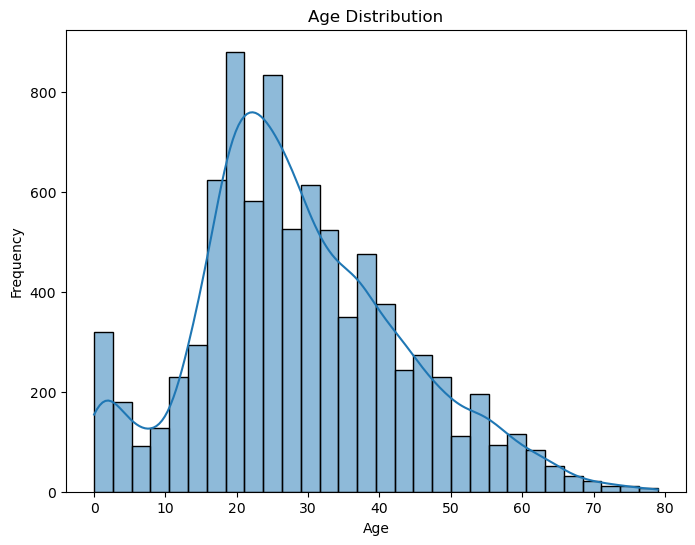

Number of young passengers (<30): 4920
Number of old passengers (>60): 220
Average age: 28.82793046746535
Transported
False    29.922858
True     27.748834
Name: Age, dtype: float64
Transported
False    79.0
True     78.0
Name: Age, dtype: float64


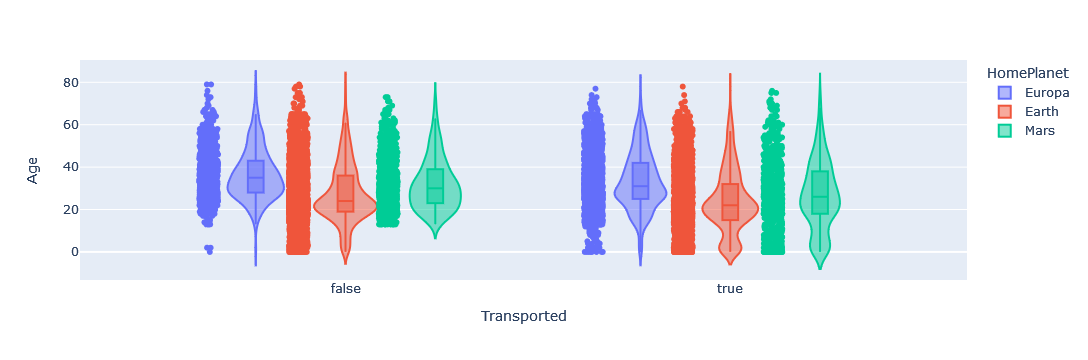

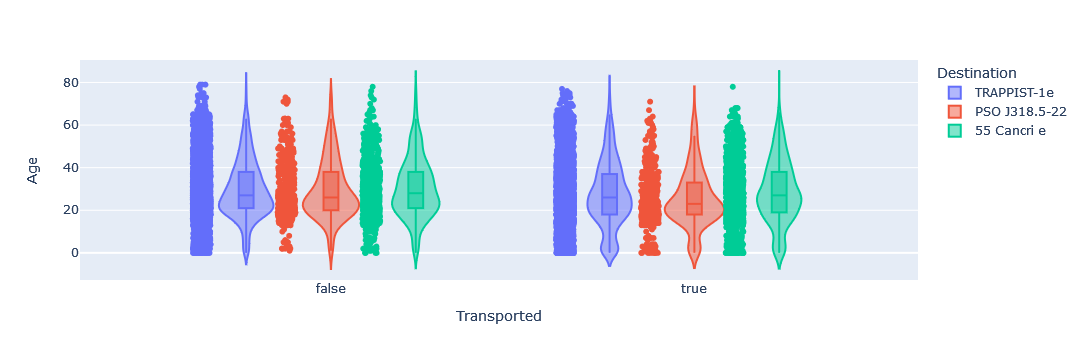

In [179]:
#How are the Age values distributed? Are there more young or older passengers? What is the average age? and how does the age depend on the transported status, the home and the destination?

# How are the Age values distributed?
plt.figure(figsize=(8, 6))
sns.histplot(train_data_space['Age'].dropna(), kde=True, bins=30)  # dropping NA values for visualization
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Are there more young or older passengers?
# Define 'young' as <30 and 'old' as >60
young_passengers = len(train_data_space[train_data_space['Age'] < 30])
old_passengers = len(train_data_space[train_data_space['Age'] > 60])
print(f'Number of young passengers (<30): {young_passengers}')
print(f'Number of old passengers (>60): {old_passengers}')

# What is the average age?
average_age =train_data_space['Age'].mean()
print(f'Average age: {average_age}')

# Average age by transported status
average_age_by_status = train_data_space.groupby('Transported')['Age'].mean()
print(average_age_by_status)

# Max age by transported status

max_age_by_status = train_data_space.groupby('Transported')['Age'].max()
print(max_age_by_status)

# Look at the age pyramid in dependence of homeplanet and if transported
df=px.data.tips()


fig=px.violin(train_data_space, y="Age", x="Transported", box=True, points="all", color="HomePlanet", hover_data=train_data_space.columns)

fig.show()

# Look at the age pyramid in dependence of destination and if transported

df2=px.data.tips()
fig2=px.violin(train_data_space, y="Age", x="Transported", box=True, points="all", color="Destination", hover_data=train_data_space.columns)

fig2.show()

## Answer to research question 2: 
#How are the Age values distributed? Are there more young or older passengers? What is the average age? and how does the age distribution depend on the transported status, the home and the destination?

# How are the Age values distributed?

One can see form the bar plot containing the number of the passenger dependening on the age that there is a comparable high number between 0 and 5 which means many newborns and small children are on the ship. Then there is a decrease in the frequency around 8-10 years. The peaks are around 20 years and 26 years  which means that people in this age are most probaly withstanding spacetravel conditions the best. Then the frequency is sinking again respresenting the age pyramid a little of a not-overaged civilzation.


# Are there more youn or older passengers?

Here we look for the number of passenger with an age below 30 years and above 60 years, where we have 220 above 60 and 4920 people  below thirty so definitely more young passengers. 

# What is the average aage (in terms of transportation status)

Here the mean age for the people not transported is 29.92 years and for people transported 27.74 years. The maximum age for people not transproted is 79 years and transported 78 years

# how does the age distribution depend on the transported status, the home and the destination?

When looking at the age pyramids depending on the home planet we can see 

### Missing values cleaning -- train data

Null values can be addressed by either replacing them with valid values or outright discarding them. In general, it is advisable to preserve more information by replacing missing values, as it provides a larger dataset for training a model. However, determining the optimal strategy to replace all missing values can be a formidable task.

Several techniques can be employed for this purpose:

   - Numeric series interpolation: This involves fitting a function between two valid values to estimate and fill in the missing ones.
   - Utilizing related data: Discovering meaningful relationships between different features (columns) and leveraging one feature to gather information about another.
   - Generating random values based on the distribution of valid values.

Likewise, there are various approaches to dropping missing data:

   - Discarding entries (rows) that contain any null value.
   - Removing an entire feature (column) that has missing values.

Furthermore, when dropping values, it is possible to establish a threshold based on the percentage of missing values relative to the total number of values.



In [59]:
#Traindataset

total_null_values=0
for col in train_data_space.columns:
    null_values=train_data_space[col].isnull().sum()
    total_null_values+=null_values
    print(col, "  Number of nullvalues in traindata:  ", null_values)
print("Total Number of nullvalues in traindata :  ", total_null_values)
print("Total percentage of nullvalues in traindata",total_null_values/len(train_data_space)*100,"%")

PassengerId   Number of nullvalues in traindata:   0
HomePlanet   Number of nullvalues in traindata:   201
CryoSleep   Number of nullvalues in traindata:   217
Cabin   Number of nullvalues in traindata:   199
Destination   Number of nullvalues in traindata:   182
Age   Number of nullvalues in traindata:   179
VIP   Number of nullvalues in traindata:   203
RoomService   Number of nullvalues in traindata:   181
FoodCourt   Number of nullvalues in traindata:   183
ShoppingMall   Number of nullvalues in traindata:   208
Spa   Number of nullvalues in traindata:   183
VRDeck   Number of nullvalues in traindata:   188
Name   Number of nullvalues in traindata:   200
Transported   Number of nullvalues in traindata:   0
Total Number of nullvalues in traindata :   2324
Total percentage of nullvalues in traindata 26.73415391694467 %


In [60]:
#testdataset
total_null_values=0
for col in test_data_space.columns:
    null_values=test_data_space[col].isnull().sum()
    total_null_values+=null_values
    print(col, "  Number of nullvalues in testdata:  ", null_values)
print("Total Number of nullvalues in testdata:  ", total_null_values)
print("Total percentage of nullvalues in testdata",total_null_values/len(train_data_space)*100, "%")

PassengerId   Number of nullvalues in testdata:   0
HomePlanet   Number of nullvalues in testdata:   87
CryoSleep   Number of nullvalues in testdata:   93
Cabin   Number of nullvalues in testdata:   100
Destination   Number of nullvalues in testdata:   92
Age   Number of nullvalues in testdata:   91
VIP   Number of nullvalues in testdata:   93
RoomService   Number of nullvalues in testdata:   82
FoodCourt   Number of nullvalues in testdata:   106
ShoppingMall   Number of nullvalues in testdata:   98
Spa   Number of nullvalues in testdata:   101
VRDeck   Number of nullvalues in testdata:   80
Name   Number of nullvalues in testdata:   94
Total Number of nullvalues in testdata:   1117
Total percentage of nullvalues in testdata 12.84941907281721 %


The training dataset contains a greater number of null values compared to the test dataset.

This difference in null values between the training and test datasets can pose challenges during the model training and evaluation process. It is important to carefully handle these null values to ensure accurate and reliable model performance.

When training a model on a dataset with more null values, it becomes crucial to implement appropriate strategies for handling missing data. These strategies may involve techniques such as data imputation, interpolation, or using models specifically designed to handle missing values.

It is essential to ensure that the imputation or interpolation methods used during training do not introduce biases or distort the underlying patterns in the data. Proper validation and evaluation techniques should be employed to assess the impact of missing values on the model's performance. 

The cleaning will be carried out before dealing with classification and regression problems to ensure appropriate fit times



In [ ]:
# Drip in both 

df = df.dropna() # drop rows with missing values
df = df.reset_index(drop=True) # reset the incremental index dropping the current one

df.head()

df.isna().any(axis=None) # is there any missing value in the dataframe?